In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("data/regressors.csv")
df.head()

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,dist,trade_2014_binary,trade_2019_binary,num_export_to,total_exp_byprod_ori,numc_import_from,total_imp_byprod_dest
0,0,0,1,650,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,1.0,5006.0,1.0,25131.0
1,1,0,1,651,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,NaN,NaN,1.0,343477.0
2,2,0,1,652,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,NaN,NaN,NaN,NaN
3,3,0,1,653,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,NaN,NaN,NaN,NaN
4,4,0,1,654,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,5.0,51209.0,3.0,3617875.0


In [4]:
# for future downsampling
# if 2014 or 2019 binary variables are 1, then its a trade regardless of whether the other one is 0 or 1. 
# so create anaother binary variable (our target variable) which follows the below: 
# 0-0:0 ; 0-1:1; 1-0:1; 1-1:1 

df["trade_binary"] = df['trade_2019_binary']+ df['trade_2014_binary']
df['trade_binary'] = df['trade_binary'].replace(2,1)
df.head()

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,dist,trade_2014_binary,trade_2019_binary,num_export_to,total_exp_byprod_ori,numc_import_from,total_imp_byprod_dest,trade_binary
0,0,0,1,650,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,1.0,5006.0,1.0,25131.0,0
1,1,0,1,651,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,NaN,NaN,1.0,343477.0,0
2,2,0,1,652,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,NaN,NaN,NaN,NaN,0
3,3,0,1,653,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,NaN,NaN,NaN,NaN,0
4,4,0,1,654,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,5.0,51209.0,3.0,3617875.0,0


In [5]:
df.columns

Index(['Unnamed: 0', 'location_id', 'partner_id', 'product_id',
       'export_value_2014', 'import_value_2014', 'hs_eci_2014', 'hs_coi_2014',
       'export_value_2019', 'dist', 'trade_2014_binary', 'trade_2019_binary',
       'num_export_to', 'total_exp_byprod_ori', 'numc_import_from',
       'total_imp_byprod_dest', 'trade_binary'],
      dtype='object')

In [6]:
# fill missing values in regressors
df[['num_export_to', 'total_exp_byprod_ori', 'numc_import_from',
       'total_imp_byprod_dest']] = df[['num_export_to', 'total_exp_byprod_ori', 'numc_import_from',
       'total_imp_byprod_dest']].fillna(0)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,dist,trade_2014_binary,trade_2019_binary,num_export_to,total_exp_byprod_ori,numc_import_from,total_imp_byprod_dest,trade_binary
0,0,1,650,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,1.0,5006.0,1.0,25131.0,0
1,0,1,651,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,0.0,0.0,1.0,343477.0,0
2,0,1,652,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,0.0,0.0,0.0,0.0,0
3,0,1,653,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,0.0,0.0,0.0,0.0,0
4,0,1,654,0.0,0.0,0.0,0.0,0.0,13257.81,0,0,5.0,51209.0,3.0,3617875.0,0


In [7]:
# check for nan values
df[df.isna().any(axis=1)].shape

(22526400, 16)

In [8]:
df = df.dropna()
df.shape

(59582016, 16)

In [ ]:
## downsampling

In [9]:
df_pos = df[(df['trade_binary']==1)]
df_neg = df[(df['trade_binary']==0)]

In [10]:
num_neg = len(df_pos)*2
print(num_neg)

8317428


In [11]:
df_neg_sampled = df_neg.sample(n=num_neg, random_state=0)
df_neg_sampled.shape

(8317428, 16)

In [12]:
df_downsampled = pd.concat([df_pos,df_neg_sampled], ignore_index=True)
df_downsampled.head()

,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,dist,trade_2014_binary,trade_2019_binary,num_export_to,total_exp_byprod_ori,numc_import_from,total_imp_byprod_dest,trade_binary
0,0,1,677,0.0,0.0,0.0,0.0,2124.0,13257.81,0,1,1.0,5038.0,8.0,663948.0,1
1,0,1,678,0.0,0.0,0.0,0.0,38819.0,13257.81,0,1,2.0,8647.0,13.0,13777757.0,1
2,0,1,803,0.0,0.0,0.0,0.0,1149.0,13257.81,0,1,1.0,3465.0,17.0,86161870.0,1
3,0,1,809,0.0,0.0,0.0,0.0,3158.0,13257.81,0,1,3.0,21639.0,16.0,7951092.0,1
4,0,1,826,0.0,0.0,0.0,0.0,4987.0,13257.81,0,1,3.0,2302.0,12.0,2327603.0,1


In [16]:
#shuffling the dataset
# df_downsampled = df_downsampled.sample(frac=1)
# df_downsampled

,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,dist,trade_2014_binary,trade_2019_binary,num_export_to,total_exp_byprod_ori,numc_import_from,total_imp_byprod_dest,trade_binary
8272921,142,33,1820,0.0,0.0,0.000000,0.000000,0.0,7747.709,0,0,50.0,44905101.0,17.0,646361.0,0
4055804,246,152,1197,4518.0,0.0,0.280307,1.723713,11929.0,2708.201,1,1,17.0,1335196.0,1.0,4518.0,1
81237,7,224,1438,892.0,0.0,0.095593,-0.296020,0.0,2994.246,1,0,29.0,276973.0,16.0,1108708.0,1
11461771,85,113,752,0.0,0.0,0.000000,0.000000,0.0,5859.634,0,0,0.0,0.0,6.0,255566.0,0
5493996,84,62,1369,0.0,0.0,0.000000,0.000000,0.0,5564.845,0,0,1.0,3297.0,8.0,5334319.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994155,249,117,1272,0.0,0.0,0.000000,0.000000,0.0,4689.043,0,0,72.0,28131584.0,1.0,117143.0,0
5749832,7,26,1212,0.0,0.0,0.000000,0.000000,0.0,3908.161,0,0,105.0,29135090.0,35.0,5852837.0,0
9601213,83,231,1321,0.0,0.0,0.000000,0.000000,0.0,8246.163,0,0,0.0,0.0,13.0,43098986.0,0
4551364,115,221,1177,0.0,0.0,0.000000,0.000000,0.0,13029.740,0,0,2.0,19476.0,2.0,8068.0,0


In [13]:
df_downsampled.shape

(12476142, 16)

In [14]:
## conversion to log

# replace 0 with a very small value for log calc
df_downsampled['total_exp_byprod_ori_log'] = df_downsampled['total_exp_byprod_ori'].replace(0.0, 10e-5)
df_downsampled['total_imp_byprod_dest_log'] = df_downsampled['total_imp_byprod_dest'].replace(0.0, 10e-5)
df_downsampled.head()

,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,dist,trade_2014_binary,trade_2019_binary,num_export_to,total_exp_byprod_ori,numc_import_from,total_imp_byprod_dest,trade_binary,total_exp_byprod_ori_log,total_imp_byprod_dest_log
0,0,1,677,0.0,0.0,0.0,0.0,2124.0,13257.81,0,1,1.0,5038.0,8.0,663948.0,1,5038.0,663948.0
1,0,1,678,0.0,0.0,0.0,0.0,38819.0,13257.81,0,1,2.0,8647.0,13.0,13777757.0,1,8647.0,13777757.0
2,0,1,803,0.0,0.0,0.0,0.0,1149.0,13257.81,0,1,1.0,3465.0,17.0,86161870.0,1,3465.0,86161870.0
3,0,1,809,0.0,0.0,0.0,0.0,3158.0,13257.81,0,1,3.0,21639.0,16.0,7951092.0,1,21639.0,7951092.0
4,0,1,826,0.0,0.0,0.0,0.0,4987.0,13257.81,0,1,3.0,2302.0,12.0,2327603.0,1,2302.0,2327603.0


In [15]:
# convert to log values
df_downsampled['total_exp_byprod_ori_log'] = df_downsampled['total_exp_byprod_ori_log'].apply(np.log)
df_downsampled['total_imp_byprod_dest_log'] = df_downsampled['total_imp_byprod_dest_log'].apply(np.log)
df_downsampled['dist_log'] = df_downsampled['dist'].apply(np.log)
df_downsampled.head()

,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,dist,trade_2014_binary,trade_2019_binary,num_export_to,total_exp_byprod_ori,numc_import_from,total_imp_byprod_dest,trade_binary,total_exp_byprod_ori_log,total_imp_byprod_dest_log,dist_log
0,0,1,677,0.0,0.0,0.0,0.0,2124.0,13257.81,0,1,1.0,5038.0,8.0,663948.0,1,8.524764,13.405959,9.492342
1,0,1,678,0.0,0.0,0.0,0.0,38819.0,13257.81,0,1,2.0,8647.0,13.0,13777757.0,1,9.064968,16.438566,9.492342
2,0,1,803,0.0,0.0,0.0,0.0,1149.0,13257.81,0,1,1.0,3465.0,17.0,86161870.0,1,8.150468,18.271738,9.492342
3,0,1,809,0.0,0.0,0.0,0.0,3158.0,13257.81,0,1,3.0,21639.0,16.0,7951092.0,1,9.982253,15.888820,9.492342
4,0,1,826,0.0,0.0,0.0,0.0,4987.0,13257.81,0,1,3.0,2302.0,12.0,2327603.0,1,7.741534,14.660350,9.492342


In [ ]:
## Modelling

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns

# random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
# modelling with 7 regressors : export(2014), import(2014), distances, num countries, eci 2014, coi 2014
X = df_downsampled[['total_exp_byprod_ori_log', 'num_export_to', 'total_imp_byprod_dest_log', 'numc_import_from',\
                    'dist_log','hs_eci_2014', 'hs_coi_2014']]
y = df_downsampled['trade_2019_binary']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8733299, 7) (3742843, 7) (8733299,) (3742843,)


In [18]:
#Create a RF Classifier

In [19]:
clf=RandomForestClassifier(n_estimators=10, verbose=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.3min finished


RandomForestClassifier(n_estimators=10, verbose=2)

In [20]:
y_pred_is=clf.predict(X_train)
y_pred_os=clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   26.8s finished


In [21]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("OS Accuracy:",metrics.accuracy_score(y_test, y_pred_os))

OS Accuracy: 0.8915001243706989


In [22]:
print("IS Accuracy:",metrics.accuracy_score(y_train, y_pred_is))

IS Accuracy: 0.9930989423355366


In [23]:
f1_score(y_test, y_pred_os)

0.7884000337644556

In [24]:
cm=confusion_matrix(y_test, y_pred_os)
print(cm)

[[2580205  170690]
 [ 235408  756540]]


<AxesSubplot:>

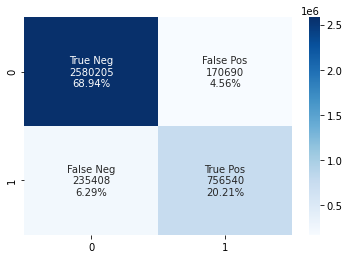

In [25]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [25]:
X.columns

Index(['total_exp_byprod_ori_log', 'num_export_to',
       'total_imp_byprod_dest_log', 'numc_import_from', 'dist_log',
       'hs_eci_2014', 'hs_coi_2014'],
      dtype='object')

In [24]:
clf.feature_importances_

array([0.14438858, 0.21429381, 0.12478317, 0.10629367, 0.11645787,
       0.18591164, 0.10787125])

In [26]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

num_export_to                0.214294
hs_eci_2014                  0.185912
total_exp_byprod_ori_log     0.144389
total_imp_byprod_dest_log    0.124783
dist_log                     0.116458
hs_coi_2014                  0.107871
numc_import_from             0.106294
dtype: float64

No handles with labels found to put in legend.


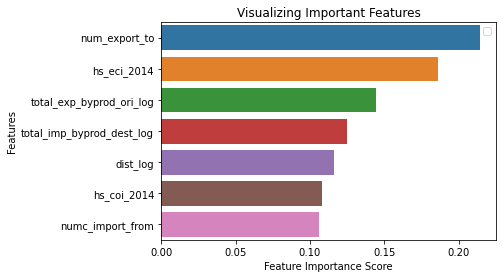

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()